In [6]:
import os
import sys
import urllib.request
import json
from nltk import Text
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from konlpy.tag import *
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from konlpy.tag import *
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

client_id = "6ihmHkReVtwHguO09rGp"
client_secret = "REr0Z1RsxU"
encText = urllib.parse.quote("오늘의 뉴스")
url = "https://openapi.naver.com/v1/search/news?query=" + encText + '&display='+ str(100) # JSON 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
title = ''
description = ''
if(rescode==200):
    response_body = response.read()
    res_body = json.loads(response_body.decode('utf-8'))
    print(res_body)
    for item in res_body['items']:
        title += item['title']
        description += item['description']
else:
    print("Error Code:" + rescode)

{'lastBuildDate': 'Fri, 14 Jul 2023 12:25:55 +0900', 'total': 1200631, 'start': 1, 'display': 100, 'items': [{'title': '[꼬꼬무 찐리뷰]&quot;월계수로 일장기 가린 손기정 부러웠다&quot;…올림픽 메달에도 고...', 'originallink': 'https://ent.sbs.co.kr/news/article.do?article_id=E10010273834&plink=ORI&cooper=NAVER', 'link': 'https://n.news.naver.com/mnews/article/416/0000297105?sid=106', 'description': '본방송을 놓친 분들을 위해, 혹은 방송을 봤지만 다시 그 내용을 곱씹고 싶은 분들을 위해 SBS연예<b>뉴스</b>가 한... &quot;자 <b>오늘의</b> 우승자가 보이고 있습니다. 누구죠? 피타넨 선수인가요? 아닙니다! 한국의 서윤복 선수입니다!... ', 'pubDate': 'Fri, 14 Jul 2023 12:21:00 +0900'}, {'title': '보건의료노조 총파업... 약국 대기시간 &apos;107분&apos; 外 [<b>오늘의</b> 주요<b>뉴스</b>]', 'originallink': 'https://www.sisunnews.co.kr/news/articleView.html?idxno=186759', 'link': 'https://www.sisunnews.co.kr/news/articleView.html?idxno=186759', 'description': '보건의료노조 총파업... 약국 대기시간 &apos;107분&apos; 전국보건의료산업노동조합(보건의료노조)이 무기한 총파업에 돌입한 13일 서울 종로구 동화면세점 앞에 모여 인력 및 공공의료 확충 등을 요구하는 총파업대회를 열었다.... ', 'pubDate': 'Fri, 14 Jul 2023 12:08:00 +0900'}, 

In [27]:
from collections import Counter
okt.pos(description)

[('본방송', 'Noun'),
 ('을', 'Josa'),
 ('놓친', 'Verb'),
 ('분', 'Noun'),
 ('들', 'Suffix'),
 ('을', 'Josa'),
 ('위해', 'Noun'),
 (',', 'Punctuation'),
 ('혹은', 'Adverb'),
 ('방송', 'Noun'),
 ('을', 'Josa'),
 ('봤지만', 'Verb'),
 ('다시', 'Noun'),
 ('그', 'Noun'),
 ('내용', 'Noun'),
 ('을', 'Josa'),
 ('곱씹고', 'Verb'),
 ('싶은', 'Verb'),
 ('분', 'Noun'),
 ('들', 'Suffix'),
 ('을', 'Josa'),
 ('위해', 'Noun'),
 ('SBS', 'Alpha'),
 ('연예', 'Noun'),
 ('<', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('뉴스', 'Noun'),
 ('</', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('가', 'Verb'),
 ('한', 'Verb'),
 ('...', 'Punctuation'),
 ('&', 'Punctuation'),
 ('quot', 'Alpha'),
 (';', 'Punctuation'),
 ('자', 'Noun'),
 ('<', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('오늘', 'Noun'),
 ('의', 'Josa'),
 ('</', 'Punctuation'),
 ('b', 'Alpha'),
 ('>', 'Punctuation'),
 ('우승자', 'Noun'),
 ('가', 'Josa'),
 ('보이', 'Noun'),
 ('고', 'Josa'),
 ('있습니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('누구', 'Noun'),
 ('죠', 'Jos

In [37]:
font_path = 'c:/Windows/fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
nouns = okt.nouns(description)
dct=Counter(nouns)
dct
dct2=dict()
dct3=dict()
for tag, count in dct.items():
    if(len(tag)>1) and (count>1):
        dct2[tag]=count
    dct3
dct2

{'위해': 5,
 '방송': 4,
 '다시': 4,
 '내용': 3,
 '뉴스': 100,
 '오늘': 96,
 '우승자': 2,
 '보이': 2,
 '누구': 2,
 '선수': 5,
 '한국': 13,
 '보건': 8,
 '의료': 12,
 '노조': 7,
 '총파업': 8,
 '시간': 9,
 '전국': 17,
 '산업': 2,
 '노동조합': 2,
 '무기한': 3,
 '돌입': 3,
 '서울': 11,
 '인력': 3,
 '확충': 4,
 '요구': 3,
 '대회': 4,
 '정규': 2,
 '시즌': 2,
 '일정': 7,
 '발표': 3,
 '사진': 28,
 '연합': 17,
 '제공': 6,
 '미국': 4,
 '프로야구': 3,
 '개막전': 2,
 '사무국': 4,
 '수상': 2,
 '의정': 6,
 '활동': 6,
 '에너지': 4,
 '라며': 5,
 '시민': 5,
 '안전': 5,
 '우선': 2,
 '생각': 3,
 '최선': 2,
 '다짐': 3,
 '이번': 3,
 '시상': 2,
 '매년': 2,
 '수도권': 6,
 '일보': 3,
 '시사': 2,
 '인용': 4,
 '명시': 4,
 '정국': 3,
 '핵심': 3,
 '워드': 2,
 '국민': 5,
 '청년': 2,
 '최고': 5,
 '정치': 3,
 '중구': 2,
 '소식': 3,
 '영상': 6,
 '위치': 3,
 '결과': 2,
 '설문': 2,
 '의원': 9,
 '무엇': 2,
 '가장': 4,
 '운세': 7,
 '우연': 3,
 '사건': 2,
 '사고': 3,
 '자신감': 2,
 '다른': 3,
 '여름': 2,
 '물놀이': 2,
 '정보': 7,
 '자료': 5,
 '출처': 3,
 '주인공': 3,
 '출제': 4,
 '퀴즈': 2,
 '금요일': 4,
 '문제': 5,
 '국민카드': 2,
 '운영': 2,
 '회원': 2,
 '맴버십': 2,
 '지난': 5,
 '본질': 2,
 '스타일': 2,
 '중요시': 2,
 '후략': 2,
 

In [38]:
im = Image.open('data/img.png')
mask_arr = np.array(im)

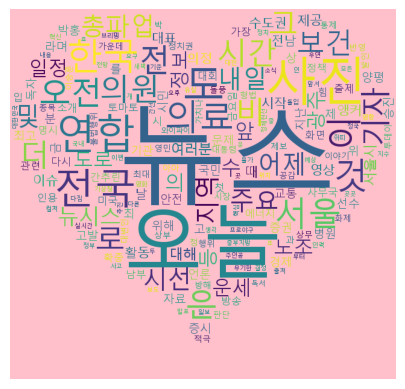

In [40]:
wc = WordCloud(width=1000, height=1000, background_color='pink', mask=mask_arr, font_path=font_path)
plt.imshow(wc.generate_from_frequencies(description2.vocab()))
plt.axis('off')
plt.savefig('data/images/naverNews.png')
plt.show()